<a href="https://colab.research.google.com/github/dibyasha2021/mini-project/blob/main/Mini_project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **All features** 
---
**Seven Emotions**
---
**Support Vector Machine**


In [78]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Extracting the features from CSV File
Data=pd.read_csv(r"/content/drive/MyDrive/Project & Research /mini project/CSV_features/Combined_Audio_features.csv")
Data=Data.drop(columns=['Unnamed: 0'])
Data

,MEAN_RMSE,MAX_RMSE,MIN_RMSE,IQR_RMSE,STD_RMSE,MEAN_SC,MAX_SC,MIN_SC,IQR_SC,STD_SC,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,Label
0,0.771957,2.092660,0.014741,1.228814,0.629168,1962.031387,6378.780076,402.558634,608.917698,1509.051985,...,2.283087,3.844167,-14.228564,0.269647,-11.322652,4.499730,-13.458061,-6.326655,-4.551631,FEAR
1,0.817040,2.150111,0.027914,0.838567,0.573831,1942.036062,6370.429580,510.573035,557.204637,1538.834203,...,-7.444870,5.448284,-12.487878,0.189825,-16.319094,1.524716,-21.328081,-3.633686,-6.368850,FEAR
2,0.785567,2.242551,0.017252,1.188739,0.613742,2442.161223,6223.610055,450.629524,1456.653181,1800.796830,...,7.653680,0.787712,-13.500839,-1.832727,-12.877916,1.519425,-18.313948,-6.033486,-3.560616,FEAR
3,0.781189,2.286831,0.012800,1.080863,0.618558,2357.061960,6657.249797,385.559075,1540.755298,1791.091198,...,-2.028609,3.328899,-12.075669,-0.014596,-15.432942,4.545129,-14.551147,-4.555892,-8.357164,FEAR
4,0.817185,1.942002,0.026914,0.911707,0.565479,1914.672326,5802.151158,460.611570,743.397902,1485.758096,...,8.218389,1.294082,-7.010327,2.554072,-14.801518,-2.347218,-18.474848,-5.801582,-2.754475,FEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.776934,2.680340,0.013900,0.847367,0.621394,2218.493047,6264.785479,468.630464,1325.269854,1673.758066,...,4.232765,-5.246085,-16.235121,-2.397815,-16.905508,-3.825086,-13.813653,-1.870977,-0.031041,PLeasant Surprise
1396,0.836154,2.266734,0.034036,0.736053,0.540618,2117.415911,6528.922272,537.039054,716.646769,1614.980860,...,9.542933,3.974788,-13.788242,-7.236237,-17.329779,1.623405,-21.575628,-8.341942,-5.100511,PLeasant Surprise
1397,0.785901,2.227862,0.010713,0.916694,0.611746,2510.453854,6473.823245,509.923165,1438.037046,1880.229078,...,1.898260,-5.140545,-22.510574,2.165768,-15.491080,-2.059357,-14.796926,-4.694530,-3.759768,PLeasant Surprise
1398,0.851966,2.131936,0.022060,0.847358,0.519802,1907.394336,6139.862964,489.082150,712.165503,1663.745624,...,3.496547,-0.303660,-10.765730,2.465810,-17.037273,-7.782178,-15.882672,-6.776903,-8.799692,PLeasant Surprise


In [80]:
#Analysis the features
Data.describe()

,MEAN_RMSE,MAX_RMSE,MIN_RMSE,IQR_RMSE,STD_RMSE,MEAN_SC,MAX_SC,MIN_SC,IQR_SC,STD_SC,...,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.797185,2.412502,0.034898,0.856709,0.592655,2054.600902,6290.452662,453.283251,1324.903245,1628.520879,...,-0.017418,3.234120,4.440555,-12.257304,-2.901361,-15.569455,-1.075874,-11.942898,-1.135006,-3.646967
std,0.051098,0.464777,0.021965,0.164680,0.067335,314.717131,339.838866,113.388921,812.235268,212.092974,...,11.161744,9.714632,6.081729,5.922906,6.048052,3.602110,4.457539,4.762830,5.819563,3.184603
min,0.440052,1.508488,0.002666,0.249900,0.402141,1353.925048,5345.015031,50.442688,405.258342,1107.602955,...,-35.986221,-30.754608,-14.317729,-30.310190,-24.194611,-28.111403,-19.820343,-24.832891,-16.698481,-14.691934
25%,0.764508,2.089739,0.019337,0.753286,0.543474,1823.835508,6073.281175,395.532589,841.205120,1499.294586,...,-8.257560,-3.318040,0.128491,-15.998787,-7.344113,-17.983141,-3.846613,-14.952312,-5.735739,-5.605731
50%,0.801751,2.347219,0.029549,0.867977,0.594278,2020.129059,6291.449849,451.359133,1051.119793,1623.539602,...,-0.708191,3.413416,4.186041,-11.956735,-1.785243,-15.494584,-0.884591,-12.113338,-1.087744,-3.572446
75%,0.835519,2.672878,0.044482,0.971221,0.640665,2237.416297,6507.808104,509.991547,1406.966220,1743.125732,...,8.165174,10.545196,8.836875,-8.282717,1.645005,-13.167436,1.769294,-9.262888,3.335302,-1.618335
max,0.914779,5.854106,0.169444,1.345610,0.893406,3079.736097,7993.279129,924.253421,4944.625634,2358.259073,...,29.925907,25.209364,20.547781,5.484965,10.026647,-0.171235,11.637547,5.744864,16.293739,8.267092


In [81]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MEAN_RMSE  1400 non-null   float64
 1   MAX_RMSE   1400 non-null   float64
 2   MIN_RMSE   1400 non-null   float64
 3   IQR_RMSE   1400 non-null   float64
 4   STD_RMSE   1400 non-null   float64
 5   MEAN_SC    1400 non-null   float64
 6   MAX_SC     1400 non-null   float64
 7   MIN_SC     1400 non-null   float64
 8   IQR_SC     1400 non-null   float64
 9   STD_SC     1400 non-null   float64
 10  C1         1400 non-null   float64
 11  C2         1400 non-null   float64
 12  C3         1400 non-null   float64
 13  C4         1400 non-null   float64
 14  C5         1400 non-null   float64
 15  C6         1400 non-null   float64
 16  C7         1400 non-null   float64
 17  C8         1400 non-null   float64
 18  C9         1400 non-null   float64
 19  C10        1400 non-null   float64
 20  C11     

In [82]:
Data.shape

(1400, 24)

In [83]:
Data.columns

Index(['MEAN_RMSE', 'MAX_RMSE', 'MIN_RMSE', 'IQR_RMSE', 'STD_RMSE', 'MEAN_SC',
       'MAX_SC', 'MIN_SC', 'IQR_SC', 'STD_SC', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'Label'],
      dtype='object')

In [84]:
Data['Label'].value_counts()

FEAR                 200
HAPPY                200
NEUTRAl              200
SAD                  200
ANGRY                200
DISGUST              200
PLeasant Surprise    200
Name: Label, dtype: int64

In [85]:
# Support Vector machine
##Importing Libraries for Classifier
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [86]:
X=Data.drop(["Label"],axis=1)
y=Data["Label"]

In [87]:
print(X,y)

      MEAN_RMSE  MAX_RMSE  MIN_RMSE  IQR_RMSE  STD_RMSE      MEAN_SC  \
0      0.771957  2.092660  0.014741  1.228814  0.629168  1962.031387   
1      0.817040  2.150111  0.027914  0.838567  0.573831  1942.036062   
2      0.785567  2.242551  0.017252  1.188739  0.613742  2442.161223   
3      0.781189  2.286831  0.012800  1.080863  0.618558  2357.061960   
4      0.817185  1.942002  0.026914  0.911707  0.565479  1914.672326   
...         ...       ...       ...       ...       ...          ...   
1395   0.776934  2.680340  0.013900  0.847367  0.621394  2218.493047   
1396   0.836154  2.266734  0.034036  0.736053  0.540618  2117.415911   
1397   0.785901  2.227862  0.010713  0.916694  0.611746  2510.453854   
1398   0.851966  2.131936  0.022060  0.847358  0.519802  1907.394336   
1399   0.817785  2.526698  0.028694  0.805921  0.571217  2064.093264   

           MAX_SC      MIN_SC       IQR_SC       STD_SC  ...         C4  \
0     6378.780076  402.558634   608.917698  1509.051985  ...

In [88]:
#spliting X & y into Traning and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [89]:
# check the shape of X_train and X_test

print(X_train.shape, X_test.shape)

(1120, 23) (280, 23)


In [90]:
print(y_train.shape, y_test.shape)
print(np.unique(y_test))

(1120,) (280,)
['ANGRY' 'DISGUST' 'FEAR' 'HAPPY' 'NEUTRAl' 'PLeasant Surprise' 'SAD']


In [91]:
# taking an object of the class of SVC
svclassifier = SVC(kernel = 'linear')
#fitting thw training Data
svclassifier.fit(X_train, y_train)
#Predicting the y values
y_pred = svclassifier.predict(X_test)

---------------Evaluation-----------------
                   precision    recall  f1-score   support

            ANGRY       1.00      1.00      1.00        41
          DISGUST       0.89      0.97      0.93        32
             FEAR       1.00      0.95      0.98        43
            HAPPY       0.88      0.95      0.92        40
          NEUTRAl       0.87      0.96      0.91        49
PLeasant Surprise       0.92      0.80      0.85        44
              SAD       0.96      0.87      0.92        31

         accuracy                           0.93       280
        macro avg       0.93      0.93      0.93       280
     weighted avg       0.93      0.93      0.93       280

----accuracy score 92.85714285714286 ----


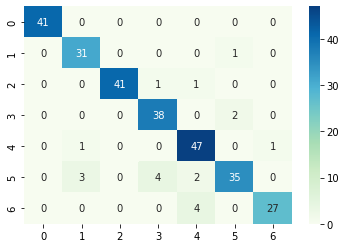

In [92]:
#Evaluation 
print("---------------Evaluation-----------------")
print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='GnBu')
plt.show()

In [77]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

#Cross-Validation
#cross validation of the dataset with the SVC classifier.
# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X, y, cv = 5)
print(cv_results)

----train accuracy score 12.589285714285714 ----
----test accuracy score 13.214285714285715 ----
[0.91428571 0.95       0.94285714 0.91428571 0.94642857]


In [93]:
#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9642857142857143
Accuracy without Scaling: 0.9535714285714286


                   precision    recall  f1-score   support

            ANGRY       1.00      1.00      1.00        36
          DISGUST       0.94      1.00      0.97        33
             FEAR       1.00      0.97      0.99        35
            HAPPY       0.90      0.93      0.91        46
          NEUTRAl       1.00      1.00      1.00        44
PLeasant Surprise       0.91      0.84      0.87        37
              SAD       1.00      1.00      1.00        49

         accuracy                           0.96       280
        macro avg       0.96      0.96      0.96       280
     weighted avg       0.96      0.96      0.96       280

----accuracy score 96.42857142857143 ----


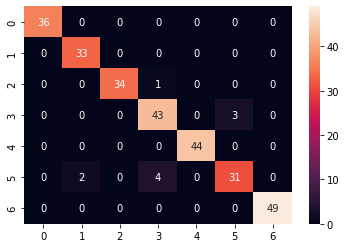

In [94]:
scaled_predictions = svc_scaled.predict(X_test)

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt='')
plt.show()

**All features**
---
**Neutral Vs Emotions**
---
**Support Vector Machine**

In [95]:
# Extracting the features from CSV File
Data2=pd.read_csv(r"/content/drive/MyDrive/Project & Research /mini project/CSV_features/data_2emo.csv")
Data2=Data2.drop(columns=['Unnamed: 0'])
Data2

,MEAN_RMSE,MAX_RMSE,MIN_RMSE,IQR_RMSE,STD_RMSE,MEAN_SC,MAX_SC,MIN_SC,IQR_SC,STD_SC,...,C5,C6,C7,C8,C9,C10,C11,C12,C13,Label
0,0.771957,2.092660,0.014741,1.228814,0.629168,1962.031387,6378.780076,402.558634,608.917698,1509.051985,...,2.283087,3.844167,-14.228564,0.269647,-11.322652,4.499730,-13.458061,-6.326655,-4.551631,OTHERS
1,0.817040,2.150111,0.027914,0.838567,0.573831,1942.036062,6370.429580,510.573035,557.204637,1538.834203,...,-7.444870,5.448284,-12.487878,0.189825,-16.319094,1.524716,-21.328081,-3.633686,-6.368850,OTHERS
2,0.785567,2.242551,0.017252,1.188739,0.613742,2442.161223,6223.610055,450.629524,1456.653181,1800.796830,...,7.653680,0.787712,-13.500839,-1.832727,-12.877916,1.519425,-18.313948,-6.033486,-3.560616,OTHERS
3,0.781189,2.286831,0.012800,1.080863,0.618558,2357.061960,6657.249797,385.559075,1540.755298,1791.091198,...,-2.028609,3.328899,-12.075669,-0.014596,-15.432942,4.545129,-14.551147,-4.555892,-8.357164,OTHERS
4,0.817185,1.942002,0.026914,0.911707,0.565479,1914.672326,5802.151158,460.611570,743.397902,1485.758096,...,8.218389,1.294082,-7.010327,2.554072,-14.801518,-2.347218,-18.474848,-5.801582,-2.754475,OTHERS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.776934,2.680340,0.013900,0.847367,0.621394,2218.493047,6264.785479,468.630464,1325.269854,1673.758066,...,4.232765,-5.246085,-16.235121,-2.397815,-16.905508,-3.825086,-13.813653,-1.870977,-0.031041,OTHERS
1396,0.836154,2.266734,0.034036,0.736053,0.540618,2117.415911,6528.922272,537.039054,716.646769,1614.980860,...,9.542933,3.974788,-13.788242,-7.236237,-17.329779,1.623405,-21.575628,-8.341942,-5.100511,OTHERS
1397,0.785901,2.227862,0.010713,0.916694,0.611746,2510.453854,6473.823245,509.923165,1438.037046,1880.229078,...,1.898260,-5.140545,-22.510574,2.165768,-15.491080,-2.059357,-14.796926,-4.694530,-3.759768,OTHERS
1398,0.851966,2.131936,0.022060,0.847358,0.519802,1907.394336,6139.862964,489.082150,712.165503,1663.745624,...,3.496547,-0.303660,-10.765730,2.465810,-17.037273,-7.782178,-15.882672,-6.776903,-8.799692,OTHERS


In [96]:
#Analysis the features
Data2.describe()

,MEAN_RMSE,MAX_RMSE,MIN_RMSE,IQR_RMSE,STD_RMSE,MEAN_SC,MAX_SC,MIN_SC,IQR_SC,STD_SC,...,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.797185,2.412502,0.034898,0.856709,0.592655,2054.600902,6290.452662,453.283251,1324.903245,1628.520879,...,-0.017418,3.234120,4.440555,-12.257304,-2.901361,-15.569455,-1.075874,-11.942898,-1.135006,-3.646967
std,0.051098,0.464777,0.021965,0.164680,0.067335,314.717131,339.838866,113.388921,812.235268,212.092974,...,11.161744,9.714632,6.081729,5.922906,6.048052,3.602110,4.457539,4.762830,5.819563,3.184603
min,0.440052,1.508488,0.002666,0.249900,0.402141,1353.925048,5345.015031,50.442688,405.258341,1107.602955,...,-35.986221,-30.754608,-14.317729,-30.310190,-24.194611,-28.111403,-19.820343,-24.832891,-16.698481,-14.691934
25%,0.764508,2.089739,0.019337,0.753286,0.543474,1823.835508,6073.281174,395.532589,841.205120,1499.294586,...,-8.257560,-3.318040,0.128491,-15.998787,-7.344113,-17.983141,-3.846613,-14.952312,-5.735739,-5.605731
50%,0.801751,2.347219,0.029549,0.867977,0.594278,2020.129060,6291.449849,451.359133,1051.119793,1623.539602,...,-0.708191,3.413416,4.186041,-11.956735,-1.785243,-15.494584,-0.884591,-12.113338,-1.087744,-3.572446
75%,0.835519,2.672878,0.044482,0.971221,0.640665,2237.416297,6507.808104,509.991546,1406.966220,1743.125733,...,8.165174,10.545196,8.836875,-8.282717,1.645005,-13.167436,1.769294,-9.262888,3.335302,-1.618335
max,0.914779,5.854106,0.169444,1.345610,0.893406,3079.736097,7993.279129,924.253421,4944.625634,2358.259073,...,29.925907,25.209364,20.547781,5.484965,10.026647,-0.171235,11.637547,5.744864,16.293739,8.267092


In [97]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MEAN_RMSE  1400 non-null   float64
 1   MAX_RMSE   1400 non-null   float64
 2   MIN_RMSE   1400 non-null   float64
 3   IQR_RMSE   1400 non-null   float64
 4   STD_RMSE   1400 non-null   float64
 5   MEAN_SC    1400 non-null   float64
 6   MAX_SC     1400 non-null   float64
 7   MIN_SC     1400 non-null   float64
 8   IQR_SC     1400 non-null   float64
 9   STD_SC     1400 non-null   float64
 10  C1         1400 non-null   float64
 11  C2         1400 non-null   float64
 12  C3         1400 non-null   float64
 13  C4         1400 non-null   float64
 14  C5         1400 non-null   float64
 15  C6         1400 non-null   float64
 16  C7         1400 non-null   float64
 17  C8         1400 non-null   float64
 18  C9         1400 non-null   float64
 19  C10        1400 non-null   float64
 20  C11     

In [98]:
Data2.shape

(1400, 24)

In [99]:
Data2.columns

Index(['MEAN_RMSE', 'MAX_RMSE', 'MIN_RMSE', 'IQR_RMSE', 'STD_RMSE', 'MEAN_SC',
       'MAX_SC', 'MIN_SC', 'IQR_SC', 'STD_SC', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'Label'],
      dtype='object')

In [100]:
Data2['Label'].value_counts()

OTHERS     1200
NEUTRAl     200
Name: Label, dtype: int64

In [101]:
X2=Data2.drop(["Label"],axis=1)
y2=Data2["Label"]

In [102]:
print(X2,y2)

      MEAN_RMSE  MAX_RMSE  MIN_RMSE  IQR_RMSE  STD_RMSE      MEAN_SC  \
0      0.771957  2.092660  0.014741  1.228814  0.629168  1962.031387   
1      0.817040  2.150111  0.027914  0.838567  0.573831  1942.036062   
2      0.785567  2.242551  0.017252  1.188739  0.613742  2442.161223   
3      0.781189  2.286831  0.012800  1.080863  0.618558  2357.061960   
4      0.817185  1.942002  0.026914  0.911707  0.565479  1914.672326   
...         ...       ...       ...       ...       ...          ...   
1395   0.776934  2.680340  0.013900  0.847367  0.621394  2218.493047   
1396   0.836154  2.266734  0.034036  0.736053  0.540618  2117.415911   
1397   0.785901  2.227862  0.010713  0.916694  0.611746  2510.453854   
1398   0.851966  2.131936  0.022060  0.847358  0.519802  1907.394336   
1399   0.817785  2.526698  0.028694  0.805921  0.571217  2064.093264   

           MAX_SC      MIN_SC       IQR_SC       STD_SC  ...         C4  \
0     6378.780076  402.558634   608.917698  1509.051985  ...

In [103]:
#spliting X2 & y2 into Traning and testing data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [104]:
# check the shape of X_train and X_test

print(X2_train.shape, X2_test.shape)

(1120, 23) (280, 23)


In [105]:
print(y2_train.shape, y2_test.shape)
print(np.unique(y2_test))
print(len(y2_test))


(1120,) (280,)
['NEUTRAl' 'OTHERS']
280


In [106]:
# taking an object of the class of SVC
svclassifier = SVC(kernel = 'linear')
#fitting thw training Data
svclassifier.fit(X2_train, y2_train)
#Predicting the y values
y2_pred = svclassifier.predict(X2_test)

---------------Evaluation-----------------
              precision    recall  f1-score   support

     NEUTRAl       0.83      0.88      0.85        49
      OTHERS       0.97      0.96      0.97       231

    accuracy                           0.95       280
   macro avg       0.90      0.92      0.91       280
weighted avg       0.95      0.95      0.95       280

----accuracy score 94.64285714285714 ----


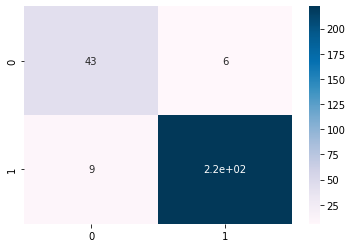

In [107]:
#Evaluation 
print("---------------Evaluation-----------------")
print(classification_report(y2_test,y2_pred))

acc = float(accuracy_score(y2_test,y2_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y2_test,y2_pred)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, cmap='PuBu')
plt.show()

In [108]:
train_acc = float(svclassifier.score(X2_train, y2_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X2_test, y2_test)*100)
print("----test accuracy score %s ----" % test_acc)

#Cross-Validation
#cross validation of the dataset with the SVC classifier.
# no. of folds cv = 5
cv_results = cross_val_score(svclassifier, X2, y2, cv = 5)
print(cv_results)

----train accuracy score 96.875 ----
----test accuracy score 94.64285714285714 ----
[0.88571429 0.92142857 0.925      0.975      0.975     ]


In [109]:
#splitting dataset into train/ test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X2_train, y2_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X2_train, y2_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(svc_scaled.score(X2_test, y2_test)))
print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X2_test, y2_test)))

Accuracy with Scaling: 0.9964285714285714
Accuracy without Scaling: 0.9714285714285714


---------------Evaluation-----------------
              precision    recall  f1-score   support

     NEUTRAl       1.00      0.97      0.98        30
      OTHERS       1.00      1.00      1.00       250

    accuracy                           1.00       280
   macro avg       1.00      0.98      0.99       280
weighted avg       1.00      1.00      1.00       280

----accuracy score 99.64285714285714 ----


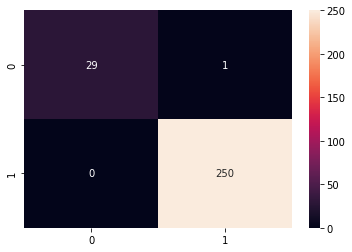

In [111]:
scaled_predictions = svc_scaled.predict(X2_test)
print("---------------Evaluation-----------------")
print(classification_report(y2_test,scaled_predictions))

acc = float(accuracy_score(y2_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y2_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt='')
plt.show()